In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
 (train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to C:\Users\한동훈\tensorflow_datasets\tf_flowers\3.0.1.incompleteNJNSUE\tf_flowers-train.tfrecord


Dataset tf_flowers downloaded and prepared to C:\Users\한동훈\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [3]:
 num_classes = metadata.features['label'].num_classes
print(num_classes)
 

5


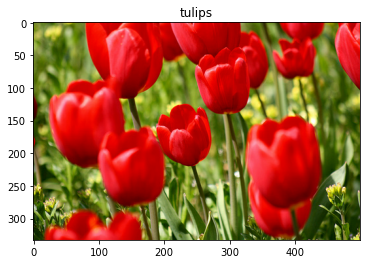

In [4]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [5]:
image.shape

TensorShape([333, 500, 3])

In [6]:
 IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

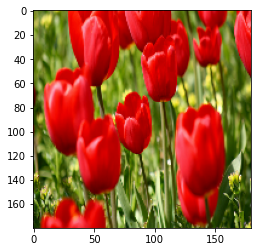

In [7]:
 result = resize_and_rescale(image)
_ = plt.imshow(result)
 

TensorShape([333, 500, 3])

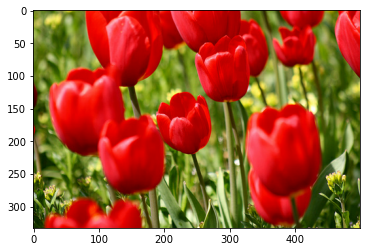

In [8]:
plt.imshow(image)
image.shape

In [9]:
 data_augmentation2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomZoom((-0.2, 0.3)),#확대만 
  layers.experimental.preprocessing.RandomContrast((0, 2))
  #layers.experimental.preprocessing.RandomCrop(3,4)
  #layers.experimental.preprocessing.RandomWidth((-0.2, 0.3))
  #layers.experimental.preprocessing.RandomTranslation((-0.2, 0.3), (-0.2, 0.3))
  #layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
# Add the image to a batch
image = tf.expand_dims(image, 0)
 

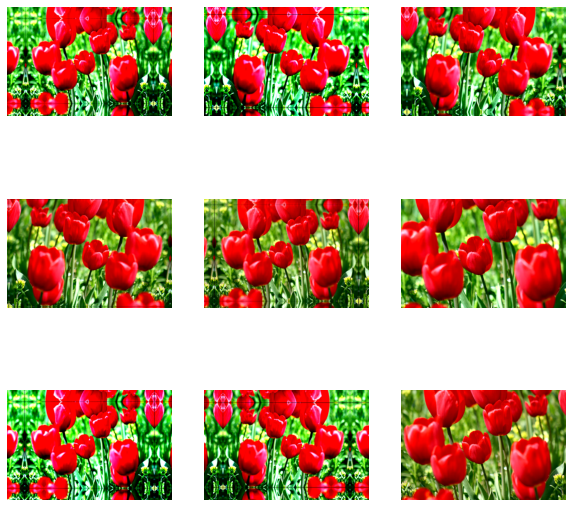

In [11]:
 plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation2(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")